In [267]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import re
import csv
import math
import json
import operator

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet

from sklearn.metrics.pairwise import cosine_similarity

# load data

### load same-side-classification dataset

In [268]:
df_ssc = pd.read_csv("within-topic/args-within-topic-training.csv",  engine = 'c',  header = 0, quotechar = '"', escapechar = "\\")
df_ssc = df_ssc.drop(axis = 1, columns = ["id", "argument1_id", "argument2_id", "debate_id"])
df_ssc

,argument1,argument2,is_same_side,topic
0,"gay marriage devalues marriage, frequency of o...",being unaccustomed to gay marriage is no argument,False,"gay marriage, debate on same sex marriage"
1,accepted. pro may extend their arguments to th...,"i""m pro-life. just think about it, your murder...",False,abortion (pro life)
2,ultrasounds fit well with pro-choice concepts.,ultrasounds are a procedure any pregnant woman...,True,mandatory ultrasounds before abortions
3,abortion should be banned nationally unless it...,abortion should be banned nationally unless it...,False,abortion should be banned nationally unless it...
4,marriage is defined as between a man and woman,marriage is celebrated because of the assumpti...,False,"gay marriage, debate on same sex marriage"
5,"there is no inviolable ""right to life"" in abor...","parents must ""control their bodies"" or else ri...",False,abortion
6,"al rantell, a homosexual talk-show host in la....",denying marriage to infertile would be too costly,False,"gay marriage, debate on same sex marriage"
7,the reproductive rights movement has no genoci...,legal abortion protects women with serious ill...,True,abortion
8,a woman has the right to her own body. not nea...,abortion should be illegal in the united states.,False,abortion
9,abortion is important to reducing over-populat...,"life is an individual right, not a privilege, ...",True,abortion


### load parliamentary debates

In [383]:
df_pos = pd.read_csv("./positive-pairs.csv", encoding = "ISO-8859-1", usecols = ["speechtext1", "speechtext2", "subtopic"])
df_pos["is_same_side"] = True
df_pos

,subtopic,speechtext1,speechtext2,is_same_side
0,PETITIONS,"I, too, rise on behalf of a large number of pe...","on another subject matter, I have a number of ...",True
1,PETITIONS,"I, too, rise on behalf of a large number of pe...",this petition has been certified correct as to...,True
2,PETITIONS,"I, too, rise on behalf of a large number of pe...","I, too, rise, pursuant to Standing Order 36, w...",True
3,PETITIONS,"I, too, rise on behalf of a large number of pe...","it is my pleasure today to rise, pursuant to S...",True
4,PETITIONS,"I, too, rise on behalf of a large number of pe...","I have the honour, pursuant to Standing Order ...",True
5,PETITIONS,"I, too, rise on behalf of a large number of pe...","as I understand, a letter was delivered to the...",True
6,PETITIONS,"I, too, rise on behalf of a large number of pe...","I, too, have a petition along the same lines s...",True
7,PETITIONS,"on another subject matter, I have a number of ...",this petition has been certified correct as to...,True
8,PETITIONS,"on another subject matter, I have a number of ...","I, too, rise, pursuant to Standing Order 36, w...",True
9,PETITIONS,"on another subject matter, I have a number of ...","it is my pleasure today to rise, pursuant to S...",True


In [384]:
df_neg = pd.read_csv("./negative-pairs.csv", encoding = "ISO-8859-1", usecols = ["speechtext1", "speechtext2", "subtopic"])
df_neg["is_same_side"] = False
df_neg

,subtopic,speechtext1,speechtext2,is_same_side
0,PETITIONS,"I, too, rise on behalf of a large number of pe...",see attached 1 hansfers to provinces in respec...,False
1,PETITIONS,"on another subject matter, I have a number of ...",see attached 1 hansfers to provinces in respec...,False
2,PETITIONS,this petition has been certified correct as to...,see attached 1 hansfers to provinces in respec...,False
3,PETITIONS,"I, too, rise, pursuant to Standing Order 36, w...",see attached 1 hansfers to provinces in respec...,False
4,PETITIONS,"it is my pleasure today to rise, pursuant to S...",see attached 1 hansfers to provinces in respec...,False
5,PETITIONS,"I have the honour, pursuant to Standing Order ...",see attached 1 hansfers to provinces in respec...,False
6,PETITIONS,"as I understand, a letter was delivered to the...",see attached 1 hansfers to provinces in respec...,False
7,PETITIONS,"I, too, have a petition along the same lines s...",see attached 1 hansfers to provinces in respec...,False
8,Gun Control,within the last week in Toronto and in surroun...,on Monday of this week the Minister of Justice...,False
9,Gun Control,within the last week in Toronto and in surroun...,last week in my constituency we held two townh...,False


In [385]:
df_pd = df_pos.append(df_neg, ignore_index = True)
df_pd = df_pd.rename(columns = {"speechtext1" : "argument1", "speechtext2" : "argument2", "subtopic" : "topic"})
df_pd

,topic,argument1,argument2,is_same_side
0,PETITIONS,"I, too, rise on behalf of a large number of pe...","on another subject matter, I have a number of ...",True
1,PETITIONS,"I, too, rise on behalf of a large number of pe...",this petition has been certified correct as to...,True
2,PETITIONS,"I, too, rise on behalf of a large number of pe...","I, too, rise, pursuant to Standing Order 36, w...",True
3,PETITIONS,"I, too, rise on behalf of a large number of pe...","it is my pleasure today to rise, pursuant to S...",True
4,PETITIONS,"I, too, rise on behalf of a large number of pe...","I have the honour, pursuant to Standing Order ...",True
5,PETITIONS,"I, too, rise on behalf of a large number of pe...","as I understand, a letter was delivered to the...",True
6,PETITIONS,"I, too, rise on behalf of a large number of pe...","I, too, have a petition along the same lines s...",True
7,PETITIONS,"on another subject matter, I have a number of ...",this petition has been certified correct as to...,True
8,PETITIONS,"on another subject matter, I have a number of ...","I, too, rise, pursuant to Standing Order 36, w...",True
9,PETITIONS,"on another subject matter, I have a number of ...","it is my pleasure today to rise, pursuant to S...",True


# preprocess data

In [272]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

    
def process(argument, stop_words, lemmatizer, index = None):
    #print progress
    if index != None and index % 1000 == 0:
        print(".", end = "")
    #remove special characters
    removed_special_characters = re.sub("[^A-Za-z]+", " ", argument).replace("  ", " ").lower()
    #tokenize
    tokens = [word.strip() for word in removed_special_characters.split(" ") if not word == "" and len(word.strip()) > 1]
    #remove stopwords
    removed_stop_words = [token for token in tokens if not token in stop_words]
    #lemmatize
    processed = []
    for word in removed_stop_words:
        tagged = nltk.pos_tag([word])
        if get_wordnet_pos(tagged[0][1]):
            processed.append(lemmatizer.lemmatize(tagged[0][0], get_wordnet_pos(tagged[0][1])))
        else:
            processed.append(lemmatizer.lemmatize(tagged[0][0]))
    return processed


def preprocess_data_frame(data, stop_words, lemmatizer):
    print("preprocessing")
    for index, row in data.iterrows():
        preprocessed_1 = process(row["argument1"], stop_words, lemmatizer, index)
        preprocessed_2 = process(row["argument2"], stop_words, lemmatizer, index)
        
        bow_arg1 = {}
        for word in set(preprocessed_1):
            if word not in bow_arg1:
                bow_arg1[word] = preprocessed_1.count(word)
        bow_arg2 = {}
        for word in set(preprocessed_2):
            if word not in bow_arg2:
                bow_arg2[word] = preprocessed_2.count(word)
        
        data.at[index, "argument1"] = [bow_arg1]
        data.at[index, "argument2"] = [bow_arg2]
    print("\n")
    return data

In [273]:
stop_words = set(stopwords.words('english')) 
lemmatizer = WordNetLemmatizer() 

df_ssc = preprocess_data_frame(df_ssc, stop_words, lemmatizer)

preprocessing
................................................................................................................................

preprocessing
........................................................................................................................................................................................................................



In [386]:
stop_words = set(stopwords.words('english')) 
lemmatizer = WordNetLemmatizer() 

df_pd = preprocess_data_frame(df_pd, stop_words, lemmatizer)

preprocessing
..........................................................................................................................................................................



In [387]:
df_ssc

,argument1,argument2,is_same_side,topic
0,"[{'obtain': 1, 'frequency': 1, 'devalues': 1, ...","[{'argument': 1, 'marriage': 1, 'gay': 1, 'una...",False,"gay marriage, debate on same sex marriage"
1,"[{'opening': 1, 'follow': 1, 'may': 1, 'accept...","[{'thing': 1, 'well': 1, 'child': 2, 'abortion...",False,abortion (pro life)
2,"[{'ultrasound': 1, 'well': 1, 'choice': 1, 'fi...","[{'ultrasound': 1, 'woman': 1, 'pregnant': 1, ...",True,mandatory ultrasounds before abortions
3,"[{'ban': 1, 'mainly': 1, 'action': 1, 'rather'...","[{'ban': 1, 'sorry': 1, 'abortion': 1, 'people...",False,abortion should be banned nationally unless it...
4,"[{'marriage': 1, 'woman': 1, 'define': 1, 'man...","[{'new': 1, 'people': 2, 'equally': 1, 'procre...",False,"gay marriage, debate on same sex marriage"
5,"[{'case': 1, 'life': 1, 'abortion': 1, 'inviol...","[{'must': 1, 'risk': 1, 'come': 1, 'child': 1,...",False,abortion
6,"[{'legitimate': 1, 'normal': 1, 'gay': 2, 'rat...","[{'would': 1, 'infertile': 1, 'marriage': 1, '...",False,"gay marriage, debate on same sex marriage"
7,"[{'reproductive': 1, 'movement': 1, 'drive': 1...","[{'legal': 1, 'vulnerable': 1, 'woman': 1, 'se...",True,abortion
8,"[{'physically': 1, 'improve': 1, 'forward': 1,...","[{'illegal': 1, 'state': 1, 'united': 1, 'abor...",False,abortion
9,"[{'globally': 1, 'important': 1, 'reduce': 1, ...","[{'must': 2, 'loce': 1, 'february': 1, 'new': ...",True,abortion


In [388]:
df_pd

,topic,argument1,argument2,is_same_side
0,PETITIONS,"[{'put': 1, 'education': 1, 'knowledge': 2, 'o...","[{'order': 1, 'various': 1, 'across': 1, 'outr...",True
1,PETITIONS,"[{'put': 1, 'education': 1, 'knowledge': 2, 'o...","[{'order': 1, 'sale': 1, 'education': 1, 'u': ...",True
2,PETITIONS,"[{'put': 1, 'education': 1, 'knowledge': 2, 'o...","[{'order': 1, 'various': 1, 'embody': 1, 'well...",True
3,PETITIONS,"[{'put': 1, 'education': 1, 'knowledge': 2, 'o...","[{'order': 1, 'house': 1, 'ask': 2, 'pleasure'...",True
4,PETITIONS,"[{'put': 1, 'education': 1, 'knowledge': 2, 'o...","[{'order': 1, 'education': 1, 'embody': 1, 'ho...",True
5,PETITIONS,"[{'put': 1, 'education': 1, 'knowledge': 2, 'o...","[{'order': 3, 'report': 1, 'security': 2, 'ask...",True
6,PETITIONS,"[{'put': 1, 'education': 1, 'knowledge': 2, 'o...","[{'oppose': 2, 'unprecedented': 1, 'almost': 1...",True
7,PETITIONS,"[{'order': 1, 'various': 1, 'across': 1, 'outr...","[{'order': 1, 'sale': 1, 'education': 1, 'u': ...",True
8,PETITIONS,"[{'order': 1, 'various': 1, 'across': 1, 'outr...","[{'order': 1, 'various': 1, 'embody': 1, 'well...",True
9,PETITIONS,"[{'order': 1, 'various': 1, 'across': 1, 'outr...","[{'order': 1, 'house': 1, 'ask': 2, 'pleasure'...",True


In [ ]:
df_gay = pd.DataFrame(columns = ["argument1", "argument2", "is_same_side", "topic"])
for i,r in df_ssc.iterrows():
    if "abortion" not in r["topic"].lower():
        df_gay = df_gay.append(r.to_dict(), ignore_index = True)
df_gay["is_same_side"] = df_gay["is_same_side"].astype("bool")
df_gay

In [276]:
df_pd.to_csv("./parliamentary-debates-bow.csv", index = False)

In [277]:
df_ssc.to_csv("./same-side-classification-bow.csv", index = False)

In [ ]:
df_ssc.to_csv("./gay-bow.csv", index = False)

## ESA

In [352]:
file = open("./all-dataset.json", "r")
data = json.load(file)
file.close()

In [430]:
pro_text = ""
con_text = ""
for argument in data["arguments"]:
    if "debate.org" not in argument["context"]["sourceUrl"]:
        premise = argument["premises"][0]["text"].lower()
        if "gay marrige" in premise or "gay marriage" in argument["conclusion"]:
            
            stance = argument["premises"][0]["stance"]
            if stance == "CON":
                con_text += premise + " "
            else:
                pro_text += premise + " "
                
        if "abortion" in premise or "abortion" in argument["conclusion"]:
            
            stance = argument["premises"][0]["stance"]
            if stance == "CON":
                con_text += premise + " "
            else:
                pro_text += premise + " "

In [431]:
print(len(pro_text))

122296


In [432]:
print(len(con_text))

77025


In [433]:
#remove urls
pro_text = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "", pro_text)
con_text = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "", con_text)

In [434]:
stop_words = set(stopwords.words('english')) 
lemmatizer = WordNetLemmatizer() 

processed_pro = process(pro_text, stop_words, lemmatizer)
processed_con = process(con_text, stop_words, lemmatizer)

In [435]:
bow_pro = {}
for word in set(processed_pro):
    if word not in bow_pro:
        bow_pro[word] = processed_pro.count(word)
print(len(bow_pro))

2612


In [436]:
bow_con = {}
for word in set(processed_con):
    if word not in bow_con:
        bow_con[word] = processed_con.count(word)
print(len(bow_con))

2139


In [437]:
all_words = set(bow_pro).union(set(bow_con))
words_pro = set(bow_pro)
words_con = set(bow_con)

In [438]:
set(bow_pro)

{'continuous',
 'dart',
 'else',
 'innocent',
 'unwelcome',
 'united',
 'offensive',
 'white',
 'twice',
 'embyros',
 'free',
 'slacker',
 'wing',
 'lerman',
 'recreation',
 'teresa',
 'unless',
 'absence',
 'recklessness',
 'soldier',
 'market',
 'sensitive',
 'frame',
 'modification',
 'intellectually',
 'much',
 'today',
 'lie',
 'land',
 'coy',
 'charity',
 'house',
 'rioting',
 'inalienable',
 'meat',
 'unwillingness',
 'anyway',
 'proven',
 'past',
 'improper',
 'myriad',
 'ludicrous',
 'sense',
 'rem',
 'opt',
 'norman',
 'christianity',
 'anonymous',
 'strain',
 'community',
 'hard',
 'bussel',
 'populace',
 'deny',
 'precise',
 'receive',
 'cost',
 'stranger',
 'wartime',
 'appeal',
 'bar',
 'medicine',
 'window',
 'love',
 'imminent',
 'supply',
 'taint',
 'poverty',
 'exact',
 'rationale',
 'kind',
 'activity',
 'nutrition',
 'contradictory',
 'enslave',
 'explanation',
 'eliminate',
 'ed',
 'background',
 'feminism',
 'various',
 'destroys',
 'physically',
 'disobedience',


# Classification via ESA

## Initialize tf-idf-Matrix

In [439]:
tf_idf_matrix = pd.DataFrame({"pro" : [0 for x in range(0, len(all_words))], \
                              "con" : [0 for x in range(0, len(all_words))]})
tf_idf_matrix.index = list(all_words)
tf_idf_matrix = tf_idf_matrix.transpose()
tf_idf_matrix

,continuous,dart,else,innocent,license,unwelcome,sang,administration,united,offensive,...,acknowledge,behaviour,minnesota,difficulty,incest,monitor,tolerable,spastic,implicitly,seriously
con,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pro,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Compute idf for each Term

In [440]:
idfs = {}

for term in all_words:
    i = 0
    if term in words_pro:
        i += 1
    if term in words_con:
        i += 1
        
    idfs[term] = math.log(2 / i , 10)
idfs

{'continuous': 0.0,
 'dart': 0.30102999566398114,
 'else': 0.0,
 'innocent': 0.0,
 'license': 0.30102999566398114,
 'unwelcome': 0.30102999566398114,
 'sang': 0.30102999566398114,
 'administration': 0.30102999566398114,
 'united': 0.0,
 'offensive': 0.30102999566398114,
 'childcare': 0.30102999566398114,
 'dog': 0.30102999566398114,
 'consensus': 0.30102999566398114,
 'white': 0.30102999566398114,
 'equivalency': 0.30102999566398114,
 'twice': 0.30102999566398114,
 'embyros': 0.30102999566398114,
 'free': 0.30102999566398114,
 'slacker': 0.0,
 'wing': 0.0,
 'lerman': 0.30102999566398114,
 'critically': 0.30102999566398114,
 'recreation': 0.30102999566398114,
 'prompt': 0.30102999566398114,
 'teresa': 0.30102999566398114,
 'countless': 0.30102999566398114,
 'unless': 0.0,
 'plastic': 0.30102999566398114,
 'absence': 0.30102999566398114,
 'song': 0.30102999566398114,
 'visa': 0.30102999566398114,
 'colonialism': 0.30102999566398114,
 'recklessness': 0.30102999566398114,
 'intention': 0.3

## Compute tf-idf-Matrix

In [441]:
for word in bow_pro:
    # normalization with log
    tf_idf_matrix.loc["pro", word] = (1.0 + math.log(bow_pro[word], 10)) * idfs[word]
    
    # normalization by length
    #tf_idf_matrix.loc["pro", word] = bow_pro[word] / len(bow_pro) * idfs[word]
    
    # normalization by max tf
    #max_tf_pro = max(bow_pro.items(), key = operator.itemgetter(1))[1]
    #tf_idf_matrix.loc["pro", word] = (0.4 + 0.6 * (bow_pro[word] / max_tf_pro)) #* idfs[word]
    
    
for word in bow_con:
    # normalization with log
    tf_idf_matrix.loc["con", word] = (1.0 + math.log(bow_con[word], 10)) * idfs[word]
    
    # normalization by length
    #tf_idf_matrix.loc["con", word] = bow_con[word] / len(bow_con) * idfs[word]
    
    # normalization by max tf
    #max_tf_con = max(bow_con.items(), key = operator.itemgetter(1))[1]
    #tf_idf_matrix.loc["con", word] = (0.4 + 0.6 * (bow_con[word] / max_tf_con)) #* idfs[word]

In [451]:
#tf_idf_matrix = tf_idf_matrix.transpose()
#
#for index, row in tf_idf_matrix.iterrows():
#   
#    
#    tf_idf_matrix.loc[index, "con"] += 0.01
#    
#    
#    
#tf_idf_matrix = tf_idf_matrix.transpose()

In [351]:
tf_idf_matrix

,continuous,dart,else,innocent,license,unwelcome,sang,administration,united,offensive,...,acknowledge,behaviour,minnesota,difficulty,incest,monitor,tolerable,spastic,implicitly,endotracheal
con,0.0,0.00000,0.0,0.0,0.30103,0.00000,0.30103,0.30103,0.0,0.00000,...,0.0,0.0,0.00000,0.0,0.00000,0.000000,0.00000,0.30103,0.00000,0.30103
pro,0.0,0.30103,0.0,0.0,0.00000,0.30103,0.00000,0.00000,0.0,0.30103,...,0.0,0.0,0.30103,0.0,0.30103,0.444658,0.30103,0.00000,0.30103,0.00000


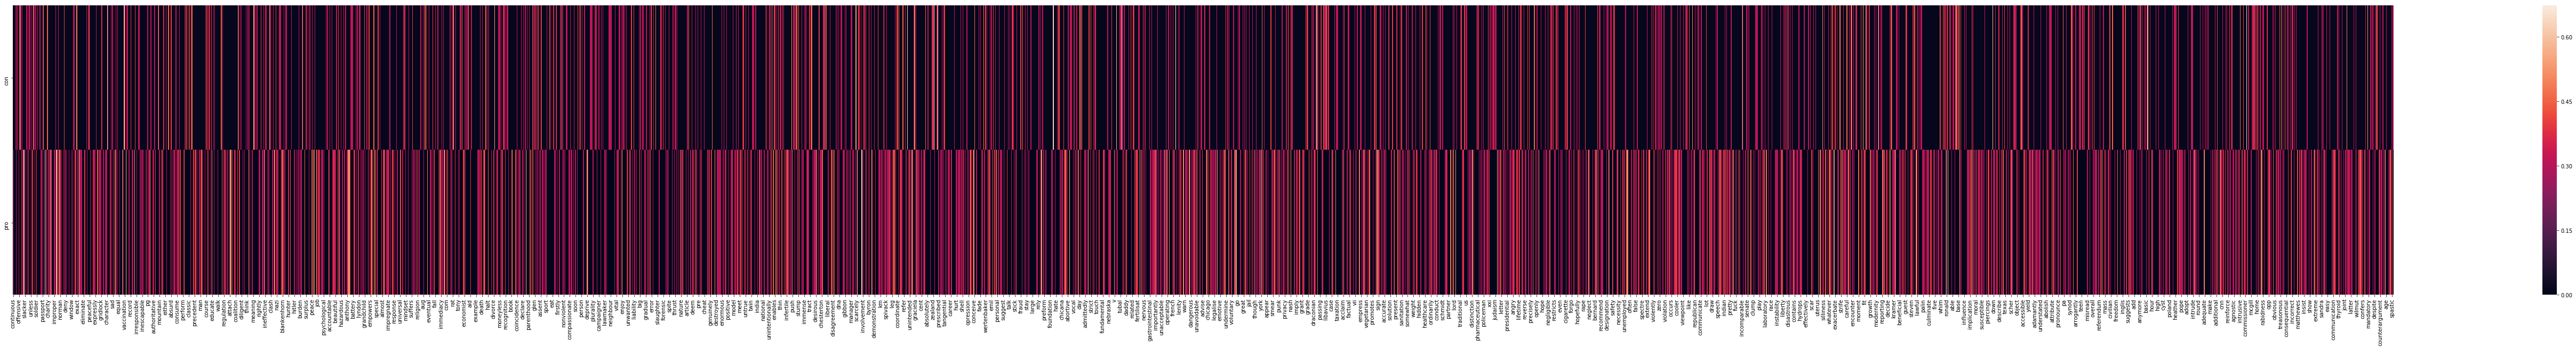

In [291]:
plt.figure(figsize = (100, 10))
sns.heatmap(tf_idf_matrix)

## Classification

In [292]:
def compute_confusion_matrix(confusion_matrix, prediction, same_side):
    if prediction and same_side:
        confusion_matrix[0] += 1
    elif prediction and not same_side:
        confusion_matrix[1] += 1
    elif not prediction and same_side:
        confusion_matrix[3] += 1
    elif not prediction and not same_side:
        confusion_matrix[2] += 1

In [449]:
def esa(data, tf_idf_matrix):
    confusion_matrix = [0, 0, 0, 0]

    for index, row in data.iterrows():

        bow_arg1 = row["argument1"][0]
        bow_arg2 = row["argument2"][0]
        same_side = row.is_same_side

        res_arg1 = {"pro" : 0.0, "con" : 0.0}
        res_arg2 = {"pro" : 0.0, "con" : 0.0}

        for term in bow_arg1:
            if term in all_words:
                # no normalization
                #res_arg1["pro"] += tf_idf_matrix.loc["pro", term] * bow_arg1[term]
                #res_arg1["con"] += tf_idf_matrix.loc["con", term]  * bow_arg1[term]

                # normalization by length
                #res_arg1["pro"] += tf_idf_matrix.loc["pro", term] * (bow_arg1[term] / len(bow_arg1))
                #res_arg1["con"] += tf_idf_matrix.loc["con", term]  * (bow_arg1[term] / len(bow_arg1))

                # normalization with log
                res_arg1["pro"] += tf_idf_matrix.loc["pro", term] * (1.0 + math.log(bow_arg1[term], 10))
                res_arg1["con"] += tf_idf_matrix.loc["con", term]  * (1.0 + math.log(bow_arg1[term], 10))

                # normalization by max tf
                #max_tf_arg1 = max(bow_arg1.items(), key = operator.itemgetter(1))[1]
                #res_arg1["pro"] += tf_idf_matrix.loc["pro", term] * (0.4 + 0.6 * (bow_arg1[term] / max_tf_arg1))
                #res_arg1["con"] += tf_idf_matrix.loc["con", term]  * (0.4 + 0.6 * (bow_arg1[term] / max_tf_arg1))



        for term in bow_arg2:
            if term in all_words:
                # no normalization
                #res_arg2["pro"] += tf_idf_matrix.loc["pro", term] * bow_arg2[term]
                #res_arg2["con"] += tf_idf_matrix.loc["con", term]  * bow_arg2[term]

                # normalization by length
                #res_arg2["pro"] += tf_idf_matrix.loc["pro", term] * (bow_arg2[term] / len(bow_arg2))
                #res_arg2["con"] += tf_idf_matrix.loc["con", term]  * (bow_arg2[term] / len(bow_arg2))

                # normalization with log
                res_arg2["pro"] += tf_idf_matrix.loc["pro", term] * (1.0 + math.log(bow_arg2[term], 10))
                res_arg2["con"] += tf_idf_matrix.loc["con", term]  * (1.0 + math.log(bow_arg2[term], 10))

                # normalization by max tf
                #max_tf_arg2 = max(bow_arg2.items(), key = operator.itemgetter(1))[1]
                #res_arg2["pro"] += tf_idf_matrix.loc["pro", term] * (0.4 + 0.6 * (bow_arg2[term] / max_tf_arg2))
                #res_arg2["con"] += tf_idf_matrix.loc["con", term]  * (0.4 + 0.6 * (bow_arg2[term] / max_tf_arg2))



        # same-side by max value
        stance_arg1 = max(res_arg1.items(), key = operator.itemgetter(1))[0]
        stance_arg2 = max(res_arg2.items(), key = operator.itemgetter(1))[0]

        prediction = False
        if stance_arg1 == stance_arg2:
            prediction = True



        # same-side by cosine similarity
        #vec_arg1 = [res_arg1["pro"], res_arg1["con"]]
        #vec_arg2 = [res_arg2["pro"], res_arg2["con"]]
        #similarity = cosine_similarity([vec_arg1], [vec_arg2])[0][0]

        #print(vec_arg1)
        #print(vec_arg2)
        #print(similarity)

        #prediction = False
        #if similarity >= 0.5:
        #    prediction = True

        compute_confusion_matrix(confusion_matrix, prediction, same_side)


        #if index == 5000: break

        if index % 1000 == 0:
            print(".", end = "")

    print("\n")    


    print(str(confusion_matrix[0]) + "   " + str(confusion_matrix[1]))
    print(str(confusion_matrix[3]) + "   " + str(confusion_matrix[2]))
    print(str((confusion_matrix[0] + confusion_matrix[2]) / sum(confusion_matrix)))

In [450]:
esa(df_gay, tf_idf_matrix)
#cosine

........................

7976   5754
5301   4032
0.5206607986818714


In [295]:
#esa(df_pd, tf_idf_matrix)

............................................................................................................

53649   53649
182   182
0.5


In [265]:
#esa(df_ssc, tf_idf_matrix)

................................................................

28182   20232
5929   9560
0.5906138991909613


In [266]:
#esa(df_pd, tf_idf_matrix)

............................................................................................................

53712   53712
119   119
0.5


In [389]:
df_pd["is_same_side"].value_counts()

True     53831
False    30921
Name: is_same_side, dtype: int64